In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 데이터 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0


In [2]:
# 흑백 변환 함수
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# 훈련 데이터와 테스트 데이터를 흑백으로 변환
x_train_gray = np.array([rgb2gray(img) for img in x_train])
x_test_gray = np.array([rgb2gray(img) for img in x_test])

# 차원 확장 (모델 입력에 필요한 차원으로 맞추기 위해)
x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


In [3]:
from tensorflow.keras import layers, models

def build_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    # 인코더
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c1)
    c2 = layers.MaxPooling2D((2, 2))(c2)
    
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c2)
    c3 = layers.MaxPooling2D((2, 2))(c3)
    
    # 디코더
    u1 = layers.UpSampling2D((2, 2))(c3)
    u1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    
    u2 = layers.UpSampling2D((2, 2))(u1)
    u2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    
    u3 = layers.UpSampling2D((2, 2))(u2)
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(u3)
    
    model = models.Model(inputs, outputs)
    return model

input_shape = (32, 32, 1)
model = build_model(input_shape)

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 3)           │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 740,227 (2.82 MB)

 Trainable params: 740,227 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 모델 학습
model.fit(x_train_gray, x_train, epochs=20, batch_size=64, validation_data=(x_test_gray, x_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 253s 315ms/step - loss: 0.0218 - val_loss: 0.0105
Epoch 2/20
412/782 ━━━━━━━━━━━━━━━━━━━━ 1:47 290ms/step - loss: 0.0104

KeyboardInterrupt: 

In [ ]:
preds = model.predict(x_test_gray)

# 일부 결과 시각화
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 흑백 이미지
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_gray[i].squeeze(), cmap='gray')
    ax.axis('off')
    
    # 예측된 컬러 이미지
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(preds[i])
    ax.axis('off')
    
    # 실제 컬러 이미지
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i])
    ax.axis('off')

plt.show()

In [ ]:
model.save('color.keras')

In [5]:
new = tf.keras.models.load_model('color.keras')

In [6]:
pre = new.predict(x_test_gray)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step


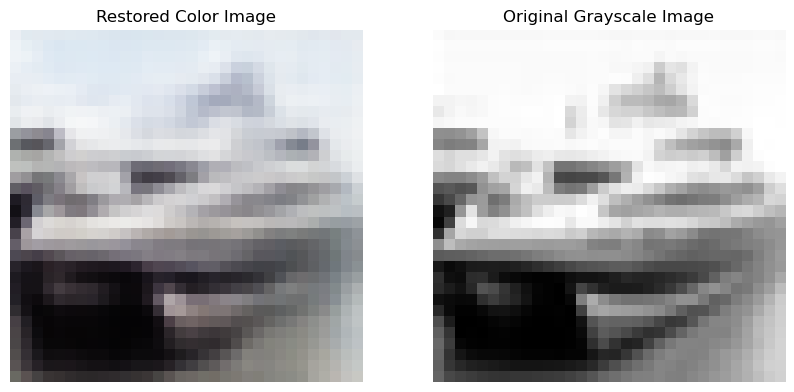

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 첫 번째 이미지 (복원된 컬러 이미지)
axs[0].imshow(pre[1])
axs[0].set_title('Restored Color Image')
axs[0].axis('off')  # 축 제거

# 두 번째 이미지 (원본 흑백 이미지)
axs[1].imshow(x_test_gray[1], cmap='gray')
axs[1].set_title('Original Grayscale Image')
axs[1].axis('off')  # 축 제거

# 그래프 표시
plt.show()